In [2]:
import sys
sys.path.insert(0, "../../")
#from classes.stat_phys.potentials import P_dist_handler, H_pot
from classes.stat_phys.potentials1 import H_Metro_MonteCarlo as H_Metro
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [3]:
def V(x):
    return (-1  -np.exp(-((x+15)/10)**2) \
              -2*np.exp(-((x-10)/10)**2) + \
                -np.exp(-((x-35)/10)**2) \
              -3*np.exp(-((x-60)/10)**2) \
                -np.exp(-((x-85)/10)**2)\
              -2*np.exp(-((x-110)/10)**2) \
              ) * \
            (1+1/5*np.cos(2*np.pi/2.5*x))

Text(0, 0.5, '$V(x)$')

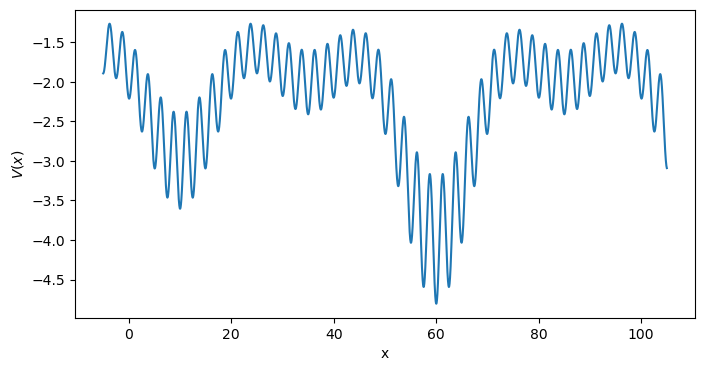

In [4]:
fig, ax = plt.subplots(figsize=(8,4))
xs = np.linspace(-5.0, 105, 5000)
ax.plot(xs, V(xs))
ax.set_xlabel("x")
ax.set_ylabel(r"$V(x)$")

In [5]:
def proposal_func_new(x, delta=5.0, min_bound=np.array([0.0]), max_bound=np.array([100.0])):
    x_n = proposal_func(x=x, delta=delta)
    if x_n > max_bound:
        return max_bound
    elif x_n < min_bound:
        return min_bound
    else:
        return x_n

def proposal_func(x, delta=5.0): #What does he mean exactly by random walker? #Have just taken projection of random angle onto x-coordinate
    return x + delta*np.cos(np.random.rand(1)*2.0*np.pi)

def proposal_func1(x, delta=1.0):
    return x + delta*(2.0*np.random.rand(1) - 1.0)

def proposal_func2(x, delta=7.0):
    return x + delta*(np.random.randint(low=-1, high=1))

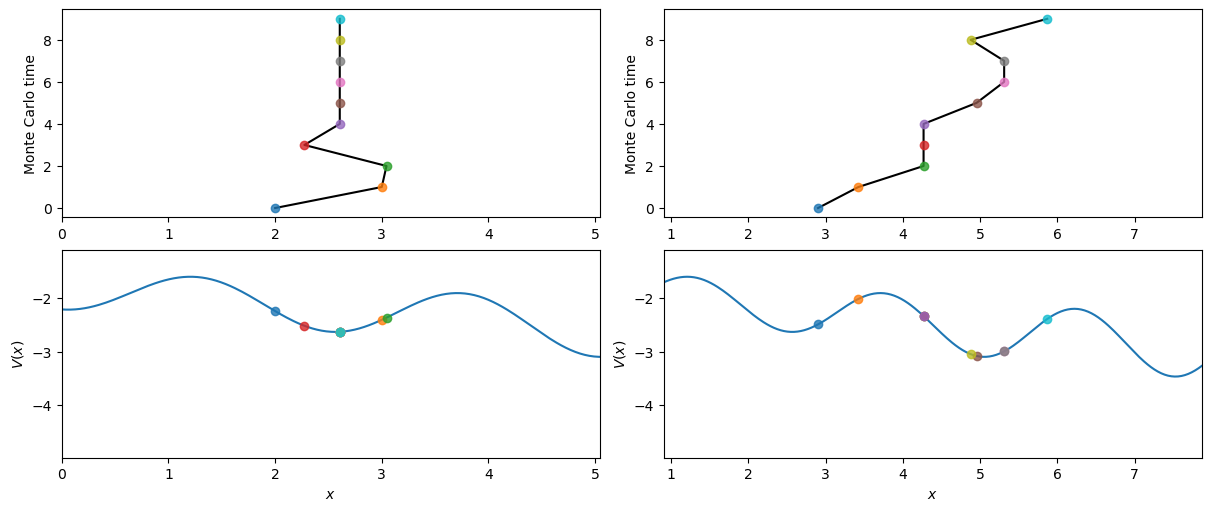

In [6]:
fig, axs = plt.subplots(2,2, figsize=(12,5), layout="constrained")
Ts = [0.05, 0.55]


for i, T in enumerate(Ts):
    pot = H_Metro(T=T, v_func=V, v_func_args={}, x0=2.0, proposal_func=proposal_func_new, proposal_func_args={"delta":1.0}, N=2000)
    pdist = pot.get_pdist()
    xs = pdist[0:10]
    mont_times = np.arange(0, len(xs), 1)
    axx = axs[:,i]
    axx[0].set_xlim([np.min(xs)-2.0, np.max(xs)+2.0])
    axx[1].set_xlim([np.min(xs)-2.0, np.max(xs)+2.0])
    axx[0].set_ylabel("Monte Carlo time")
    axx[1].set_ylabel(r"$V(x)$")
    axx[0].plot(xs, mont_times, c="k")
    axx[1].set_xlabel(r"$x$")
    axx[1].plot(np.linspace(-5, 105, 5000), V(np.linspace(-5, 105, 5000)), c="C0")
    for x, mont_time in zip(xs, mont_times):
        axx[1].plot(x, V(x), "o", alpha=0.8)
        axx[0].plot(x, mont_time, "o", alpha=0.8)

In [7]:
Ts = [0.05, 0.55]

H_pots = {}
for T in Ts:
    H_pots[T] = []
    for i in range(5):
        pot = H_Metro(T=T, v_func=V, v_func_args={},x0=np.random.rand()*100.0, proposal_func=proposal_func_new, proposal_func_args={}, N=2000)
        pot.get_pdist()
        H_pots[T].append(pot)

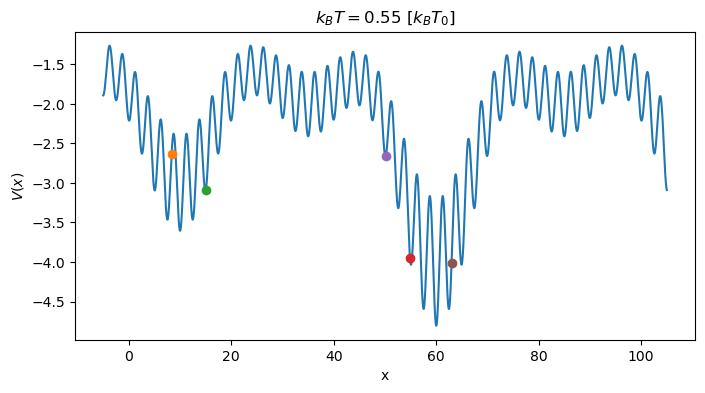

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
xs = np.linspace(-5.0, 105, 5000)
ax.plot(xs, V(xs))
ax.set_xlabel("x")
ax.set_ylabel(r"$V(x)$")
ax.set_title(r"$k_{B}T = $" + f"{Ts[1]} " + r"$\left[k_{B}T_{0}\right]$")
plot_elems = []
for H_pot in H_pots[Ts[1]]:
    l = ax.plot(H_pot.p_dist[0], H_pot(H_pot.p_dist[0]), 'o')[0]
    plot_elems.append(l)

In [9]:
def update(i, T, H_pots, drawing_elems):
    H_pot_list = H_pots[T]
    for H_pot, draw_elem in zip(H_pot_list, drawing_elems):
        draw_elem.set_data(H_pot.p_dist[i], H_pot(H_pot.p_dist[i]))
    return drawing_elems

def make_animation(T, H_pots, fig, N, draw_elems, update_func=update):
    anim = animation.FuncAnimation(fig,
                                   update_func,
                                   frames=N,
                                   interval=75,
                                   fargs=(T, H_pots, draw_elems),
                                   blit=True)
    return anim

anim = make_animation(T=Ts[1], H_pots=H_pots, fig=fig, N=200, draw_elems=plot_elems)
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
anim.save("largeT.gif", writer=writer)

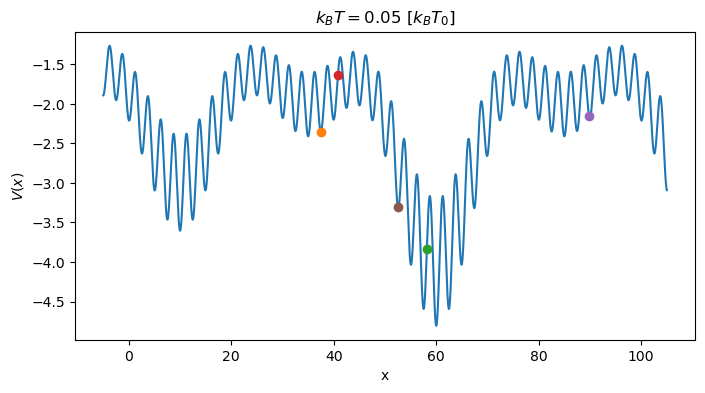

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
xs = np.linspace(-5.0, 105, 5000)
ax.plot(xs, V(xs))
ax.set_xlabel("x")
ax.set_ylabel(r"$V(x)$")
ax.set_title(r"$k_{B}T = $" + f"{Ts[0]} " + r"$\left[k_{B}T_{0}\right]$")
plot_elems = []
for H_pot in H_pots[Ts[0]]:
    l = ax.plot(H_pot.p_dist[0], H_pot(H_pot.p_dist[0]), 'o')[0]
    plot_elems.append(l)

In [11]:
anim = make_animation(T=Ts[0], H_pots=H_pots, fig=fig, N=200, draw_elems=plot_elems)

writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
anim.save("lowT.gif", writer=writer)

In [13]:
Ts = np.linspace(0.005, 3.0, 8)
def proposal_func_new(x, delta=2.0, min_bound=np.array([0.0]), max_bound=np.array([100.0])):
    x_n = proposal_func(x=x, delta=delta)
    if x_n > max_bound:
        return max_bound
    elif x_n < min_bound:
        return min_bound
    else:
        return x_n

N_T = []
for T in Ts:
    Ns = []
    for i in range(1000):
        pot = H_Metro(T=T, v_func=V, v_func_args={},x0=2.0, proposal_func=proposal_func_new, proposal_func_args={}, N=10000)
        pdist = pot.metro_montecarlo_sampling(terminate_sampling=(True, -4.75))
        Ns.append(len(pdist))
    print("done")
    N_T.append(Ns)

done
done
done
done
done
done
done
done


In [14]:
print(N_T)

[[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 1000

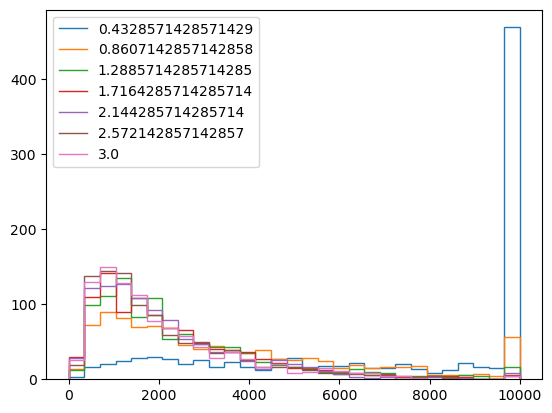

In [17]:
fig, ax = plt.subplots()
bins = np.linspace(0, 10000, 30)
for Ns, T in zip(N_T[1:], Ts[1:]):
    hist, bin_edges = np.histogram(Ns, bins=bins)
    ax.stairs(hist, bin_edges, label=T)
ax.legend()